# NLP Project: Autotranslator for Manga Pages

David Blankenship   dwb65@drexel.edu

Idea for a project. Use some OCR to extract Japanese characters from images. Then, depending on whether the OCR autotranslates, I can either translate it with a model I choose or compare to other models. Perhaps look at a BLEU score for an evaluation of some sort and try different stuff.

## Japanese Writing System

It is useful to describe the Japanese writing system briefly to understand the analysis I have in this project. There are three major elements for writing Japanese; Hiragana, katakana, and kanji. The first two are phonetic syllabaries while kanji is a logographic system derived from, but distinct to, Chinese characters where individual kanji represent specific words or concepts. Hiragana is typically used for native Japanese words while katakana is used for loanwords and various special uses. Kanji may sometimes be accompanied with small text next to it. These are called furigana and they are a reading aid used to show the pronunciation of kanji, usually for less frequently used kanji or in works expected to be read by children still learning their kanji. All three of these can be used in a sentence together. Kanji can also be used as part of a word with hiragana to form a word, for example 休む is a single word and means 'to rest' and is a kanji (休) and a hiragana character (む).

It should also be noted that there are no spacings between words or sentences. They use similar punctuation although some such as their periods, commas, or quotations look slightly different. Some such as question marks are loaned from the West but are only used in informal writings.

The order for reading Japanese is also important. Japanese can be written vertically or horizontally. If it is written vertically then the sentence starts from the top goes to the bottom and is ordered from right to left. This is the traditional style of writing and is called tategaki. Japanese can also be written horizontally and is read from left to right as in English. This is the modern style and is called yokogaki. 

We will typically see images written in tategaki, which is the traditional format for manga, while the output of our OCRs will be in yokogaki, the normal style for Japanese writing on computers.



More can be read here: https://en.wikipedia.org/wiki/Japanese_writing_system

I should also note here that I do not speak Japanese and am unable to personally verify any translations, I am simply somewhat familiar with it and know some words due to personal hobby interests over the years.

As an aside, Japanese must be a fascinating language to conduct NLP in since complex concepts can be expressed in very few tokens and the separation of words can be contextual. For example, 花霞 or hanagasumi is a combination of the kanji for flower (hana) and mist (gasumi) and literally translates to flower mist. However, the actual meaning is representing the concept of cherry blossoms in the wind being so numerous it feels like a a fog or mist of flower petals. Such a poetic concept in just two characters!

#### Import Statements

In [1]:
import os
import numpy
from PIL import Image

from manga_ocr import MangaOcr
import easyocr

from transformers import pipeline

from datasets import load_metric

In [20]:
os.listdir('./Random Manga Clips/random_manga1/')

['clip3.jpg',
 'clip4.jpg',
 'clip5.jpg',
 'clip6.jpg',
 'clip7.jpg',
 'clip8.jpg',
 'clip9.jpg',
 'clip_1.jpg',
 'clip_10.jpg',
 'clip_2.jpg',
 'random_mangaclips.jpg']

In [21]:
os.listdir('./Random Manga Clips/random_manga1/')

['clip01.jpg',
 'clip02.jpg',
 'clip03.jpg',
 'clip10.jpg',
 'clip4.jpg',
 'clip5.jpg',
 'clip6.jpg',
 'clip7.jpg',
 'clip8.jpg',
 'clip9.jpg',
 'random_mangaclips.jpg']

## OCR

Is there some specialization between MangaOCR and EasyOCR? Frankly this isn't the point of this assignment so I shouldn't be too invested in this, but later itll matter a lot. Need to consider as well a potential way to segment words or textboxes either automatically or me setting them manually.

Also throwing this out there but color boxes to find text boxes? Assuming MangaOCR doesnt have it already.

### Manga OCR

https://github.com/kha-white/manga-ocr

In [4]:
mocr = MangaOcr()

2024-06-12 22:05:06.419 | INFO     | manga_ocr.ocr:__init__:13 - Loading OCR model from kha-white/manga-ocr-base
C:\Users\dblan\anaconda3\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
2024-06-12 22:05:10.708 | INFO     | manga_ocr.ocr:__init__:25 - Using CPU
2024-06-12 22:05:11.620 | INFO     | manga_ocr.ocr:__init__:32 - OCR ready


In [5]:
text = []
for i in range(1,10):
    text.append(mocr(f'./Random Manga Clips/random_manga1/clip0{i}.jpg'))

In [6]:
text

['この爺さんがチョップマンの正体だァ？',
 'はいこちらのカメラにもそれはバッチリおさめております',
 '疑うんならもう一度チョップ食べさせたら？',
 '滅多なこと言うんじゃないよ',
 'あの僕がチョップマンと戦ってるとこ撮れてますか？',
 'え？',
 'これはなかなかの手柄ですよね',
 'しかも第一発見者もなんと僕です',
 'へぇやるね少年']

In [9]:
text2 = mocr('./twitter_manga1.jpg')
text2

'そういうことで、これからの問題があります。'

### EasyOCR

https://github.com/JaidedAI/EasyOCR

https://www.jaided.ai/easyocr/tutorial/

https://www.jaided.ai/easyocr/documentation/

In [6]:
reader = easyocr.Reader(['ja','en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [7]:
result = reader.readtext('./clip.jpg')

In [8]:
result

[([[84, 42], [114, 42], [114, 100], [84, 100]], '手', 0.06110251971301239),
 ([[23, 28], [180, 28], [180, 263], [23, 263]], '雷', 0.0055189188462458905)]

In [ ]:
def ocr_list_reader():

## Translators

translators to look at
- https://huggingface.co/Helsinki-NLP/opus-mt-ja-en
- https://huggingface.co/staka/fugumt-ja-en
- https://huggingface.co/facebook/nllb-200-distilled-600M
- https://huggingface.co/facebook/nllb-200-1.3B

or this list in general
- https://huggingface.co/models?pipeline_tag=translation&language=ja&sort=downloads


In [7]:
# Use a pipeline as a high-level helper
translate_pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-ja-en")

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-ja-en")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-ja-en")

In [8]:
translated_text = []

for i in text:
    translated_text.append(translate_pipe(i)[0]['translation_text'])
translated_text

["This old man is the identity of the chopman, isn't he?",
 '(Laughter)',
 "If you don't believe me, why don't you let him eat his chop again?",
 "Don't say that often.",
 'Are you taking pictures of me fighting the chopman?',
 'What?',
 "It's quite an honor, isn't it?",
 '(Laughter)',
 'Well done, boy.']

We see a few problems with the above translation. Indices 1 and 7 both output '(Laughter)' which is a very poor translation for both. We show the original input for these below. Of note they are far too long to be just laughter. There are various onomatopoeia for laughter but they are not this long. Three typical examples are "笑う", "げらげら", "げらげら笑う" which are all sound effects for different types of laughter.

Additionally, I do have a fan translation of this page. The dialogue was translated as follows.

"This old man's the Chopman?"

"Yeah, we caught his very transformationon camera!"

"If you wanna make sure, how about we feed him some chop?"

"Don't you dare."

"Um, did you film me fighting the Chopman?"

"Huh?"

"It was quite the accomplishment, if I do say so myself."

"I also happened to be the first one to find him"

"Good going, kid"

The translator is a random person and I think it's clear he is a little loose on direct translation tending slightly towards readability, but we can see that this translation compares quite well against the machine translation, (laughter) translations excepted.

We can also compare the text from the OCR and we can clearly see that it is an issue with the translator and not the OCR.

はいこちらのカメラにもそれはバッチリおさめております


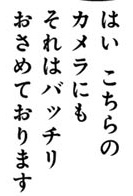

In [27]:
image = Image.open('./Random Manga Clips/random_manga1/clip02.jpg') # I start the image name numbers from 1 hence the mismatch with the index
print(text[1])
image

しかも第一発見者もなんと僕です


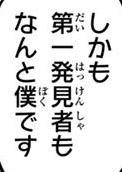

In [28]:
image = Image.open('./Random Manga Clips/random_manga1/clip08.jpg')
print(text[7])
image

Reminder the small text next to the more detailed characters are called furigana. They are reading aids, please see Japanese Writing System explanation for a reminder on what these are. That they are in the image makes sense and that they are not included in the text from the OCR is also very nice to see as it would mess up the translation.

We will try concatenating prior to translation.

In [8]:
translated_text_full = translate_pipe(''.join(text))[0]['translation_text']
translated_text_full

"This old man is the identity of the chopman, and he's got it in his camera, and if you're suspicious, you shouldn't tell him that I'm fighting the chopman. &lt;i&gt;That's a pretty good shot.&lt;/i&gt; &lt;i&gt;That's pretty impressive.&lt;/i&gt; &lt;i&gt;That's great.&lt;/i&gt; &lt;i&gt;That's great. &lt;i&gt;That's great. &lt;i&gt;That's great. &lt;i&gt;i&gt;That's great. &lt;i&gt;i&gt;That's great. &lt;i&gt;i&gt;i&gt;that's great.i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&i&gt&gt&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&i&i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt;i&gt"

Obviously, this is a poor translation. We'll try other translators.

In [9]:
fugu_translator = pipeline('translation', model='staka/fugumt-ja-en')

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

C:\Users\dblan\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dblan\.cache\huggingface\hub\models--staka--fugumt-ja-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/121M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/861k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

In [10]:
fugu_translated_text = []

for i in text:
    fugu_translated_text.append(fugu_translator(i)[0]['translation_text'])
fugu_translated_text

["tss ts sam jesus jesus jesus jesus jesus jesus jesus jesus jesus jesus jesus jesus jesus ss ss ss ss ss y ss ss y y ss ss ss ss s' s' s' s' s' s s' s' s' t s' t' t' s' t' t' t'",
 'i just kept a smash-knemmott slurpe slurpe sl sl sl slw sl sl sl ss ss sm sm sm sm sm sm sm sm sm sm sm sm sm sm sn sm sm sm sm sn sm sm sm sm sm sm sn sm sm sm sm sm sm sm sm sm ssm sm sm sm sm sm sm ssm sm sm s sm sm s s sm ss ss s ss s ss s sm s ss s s ss t s ss t ss s s s s ss ss s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s ss s s s s s ss s s s s s s s s s s s s s s s s s s s s s s s s s s s',
 'why not start smash-duffee-whistle-whistle-whistle-whistle-whistle-whissant-whiss sm slurt-whiss sm slur-whisel-whisel-whisht-whish-t-whish-whis-whiss-whiss-whiss-whiss-whiss-whiss-whis-whis-whis-whiss-whiss-whiss-whis-whis-whis-whis-whiss-whis-whis-whis-whis-whis-whis-whis-whis-whis-whis-whis-whis-whis-whis-whi-t-t-hw-t-whi s-whi s-whi s-whis-

This fugu translator is impressively terrible.

In [16]:
nllb200_dist600m_translator = pipeline('translation_ja_to_en', model='facebook/nllb-200-distilled-600M')

In [17]:
nllb200_dist600m_translated_text = []

for i in text:
    nllb200_dist600m_translated_text.append(nllb200_dist600m_translator(i)[0]['translation_text'])
nllb200_dist600m_translated_text

['en, es es un hombre de Chop, ¿no es un hombre de Chop?',
 'en, en la cámara, que es muy buena.',
 'en, no wonder if i could eat chop again?',
 'en, y no hablas de cosas raras.',
 'en, no? no. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No. No',
 'en? yeah?',
 'en, es es un manipo de mano, ¿no es?',
 'en, yo soy el primero en descubrir.',
 'en, muchacho.']

For some reason this is translating to Spanish and even a line in English. Perhaps, a bug with the code or poor training data; mixing English with Spanish perhaps? At least we can see some of the translation is sort of accurate albeit in Spanish.

In [18]:
# Trying es which should be spanish
nllb200_dist600m_translator = pipeline('translation_ja_to_es', model='facebook/nllb-200-distilled-600M')
nllb200_dist600m_translated_text = []

for i in text:
    nllb200_dist600m_translated_text.append(nllb200_dist600m_translator(i)[0]['translation_text'])
nllb200_dist600m_translated_text

['es a true Chopman, right?',
 'es, y a bien des photos, y a bien des photos.',
 'es, y si te lo dejes otra vez?',
 'es, y no hablas de muchas cosas.',
 'es photo of me fighting chopman?',
 'es? ¿Qué es? ¿Qué es? ¿Qué es?',
 'esito, ¿no es un buen manejo?',
 'es, y yo fui el primer descubridor.',
 'es, niño.']

In [6]:
nllb200_dist1p3B_translator = pipeline('translation_ja_to_en', model='facebook/nllb-200-1.3B')
nllb200_dist1p3B_translated_text = []

for i in text:
    nllb200_dist1p3B_translated_text.append(nllb200_dist1p3B_translator(i)[0]['translation_text'])
nllb200_dist1p3B_translated_text

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

C:\Users\dblan\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dblan\.cache\huggingface\hub\models--facebook--nllb-200-1.3B. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

['en, ¿qué te parece? ¿Qué te parece? ¿Qué te parece?',
 'enenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenen',
 'en ja疑うんならまたチョップを食べさせたら?',
 'en 滅多的事情說不よ',
 'en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en, en',
 'en? - Yeah, yeah, yeah',
 'en en en en en en en en en en en en en en en en en en en en en e

Again, I am recieving nonsense in three different languages; English, Spanish, and Japanese. This is supposed to be en. Clearly the nllb model has serious issues. I will be sticking with the Helsinki-NLP/opus-mt-ja-en model. We do at least see some of the translations are decent and even in English! Also the Japanese text is just the input text. Also it isn't lost on me that all the translations for the nllb model appear to have the two letter language code tokens at the front. This suggests to me some sort of strange bug in the model.

Regardless, I elect to return to image preprocessing to try to improve the translation. I will slice the (laughter) translated pages into pieces and feed it into the translator.

In [11]:
slices = []
for i in range(1,5):
    slices.append(mocr(f'./Random Manga Clips/random_manga1/clip02 slices/slice0{i}.jpg'))

translated_slices = []

for i in slices:
    translated_slices.append(translate_pipe(i)[0]['translation_text'])
translated_slices

['Here you go.',
 'And the camera.',
 "That's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's... that's...",
 "I'll leave you to it."]

In [12]:
slices

['はいこちらの', 'カメラにも', 'それはバッチリ', 'おさめております']

This is quite bad, though it does at least recognize the word camera

In [18]:
print(translate_pipe(''.join(slices)))
print(translate_pipe(''.join(slices[0:2])))
print(translate_pipe(''.join(slices[2:])))

print(translate_pipe(''.join(slices[1:3])))

[{'translation_text': '(Laughter)'}]
[{'translation_text': "Yes, sir. It's on this camera."}]
[{'translation_text': "It's all right, sir. It's all right. It's all right."}]
[{'translation_text': "And that's not a bad idea for the camera."}]


It appears that there is a short of push and pull occurring. If we look at the sentence as a full context then it seems that there is a point where the translator loses the meaning of the whole sentence and gives back nonsense. Too little context if you slice apart the sentence and it loses the whole context. There seems to be a sweet spot of context for the translator see ........

Interestingly this actually models Japanese writing where context helps you separate words and the meaning vice spaces like in English.

## Evaluation

### BLEU
The Bilingual Evaluation Understudy (BLEU) algorithm is a scoring system for the quality of machine translations. It works by ... . However there are issues .... . Of note, it requires a human translator to create a translation. As I am not fluent in Japanese, I elect to use Google Translate as a stand in. It is not perfect, it is inferior to a human translator, but it is a decent enough benchmark. All these issues considered, I use BLEU here as a way of judging the quality of translation.

In [44]:
# references = [
#               ["This old man's the Chopman?"], 
#               ["Yeah, we caught his very transformationon camera!"],
#               ["If you wanna make sure, how about we feed him some chop?"],
#               ["Don't you dare."],
#               ["Um, did you film me fighting the Chopman?"],
#               ["Huh?", "What?"], # using some knowledge え is an expression of surprise and 'huh' or 'what' are perfectly valid translations
#               ["It was quite the accomplishment, if I do say so myself."],
#               ["I also happened to be the first one to find him"],
#               ["Good going, kid"]
#              ]

references = [
              [["This", "old", "man's", "the", "Chopman?"]], 
              [["Yeah,", "we", "caught", "his", "very", "transformation", "on", "camera!"]],
              [["If", "you", "wanna", "make", "sure,", "how", "about", "we", "feed", "him", "some", "chop?"]],
              [["Don't", "you", "dare."]],
              [["Um,", "did", "you", "film", "me", "fighting", "the", "Chopman?"]],
              [["Huh?"], ["What?"]], # using some knowledge え is an expression of surprise and 'huh' or 'what' are perfectly valid translations
              [["It", "was", "quite", "the", "accomplishment,", "if", "I", "do", "say", "so", "myself."]],
              [["I", "also", "happened", "to", "be", "the", "first", "one", "to", "find", "him"]],
              [["Good", "going,", "kid"]]
             ]



tr_text_lists = []
for tr in translated_text:
    tr_text_lists.append(tr.split(' '))
    # tr_text_lists.append([j for j in tr.split(' ')])
print(tr_text_lists)




[['This', 'old', 'man', 'is', 'the', 'identity', 'of', 'the', 'chopman,', "isn't", 'he?'], ['(Laughter)'], ['If', 'you', "don't", 'believe', 'me,', 'why', "don't", 'you', 'let', 'him', 'eat', 'his', 'chop', 'again?'], ["Don't", 'say', 'that', 'often.'], ['Are', 'you', 'taking', 'pictures', 'of', 'me', 'fighting', 'the', 'chopman?'], ['What?'], ["It's", 'quite', 'an', 'honor,', "isn't", 'it?'], ['(Laughter)'], ['Well', 'done,', 'boy.']]


In [10]:
bleu_metric = load_metric('bleu')

C:\Users\dblan\AppData\Local\Temp\ipykernel_21472\1426619684.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric('bleu')
C:\Users\dblan\anaconda3\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for bleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/bleu/bleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [29]:
translated_text

["This old man is the identity of the chopman, isn't he?",
 '(Laughter)',
 "If you don't believe me, why don't you let him eat his chop again?",
 "Don't say that often.",
 'Are you taking pictures of me fighting the chopman?',
 'What?',
 "It's quite an honor, isn't it?",
 '(Laughter)',
 'Well done, boy.']

In [45]:
results = bleu_metric.compute(predictions=tr_text_lists, references=references)
print(results)

{'bleu': 0.0, 'precisions': [0.26, 0.0975609756097561, 0.02857142857142857, 0.0], 'brevity_penalty': 0.7866278610665535, 'length_ratio': 0.8064516129032258, 'translation_length': 50, 'reference_length': 62}


The bleu score seems overly bad to me, so I try without the (laughter) translations

In [48]:
references = [
              [["This", "old", "man's", "the", "Chopman?"]], 
              [["If", "you", "wanna", "make", "sure,", "how", "about", "we", "feed", "him", "some", "chop?"]],
              [["Don't", "you", "dare."]],
              [["Um,", "did", "you", "film", "me", "fighting", "the", "Chopman?"]],
              [["Huh?"], ["What?"]], # using some knowledge え is an expression of surprise and 'huh' or 'what' are perfectly valid translations
              [["It", "was", "quite", "the", "accomplishment,", "if", "I", "do", "say", "so", "myself."]],
              [["Good", "going,", "kid"]]
             ]

tr_text_lists.pop(-2)
tr_text_lists.pop(1)
tr_text_lists

[['This',
  'old',
  'man',
  'is',
  'the',
  'identity',
  'of',
  'the',
  'chopman,',
  "isn't",
  'he?'],
 ['If',
  'you',
  "don't",
  'believe',
  'me,',
  'why',
  "don't",
  'you',
  'let',
  'him',
  'eat',
  'his',
  'chop',
  'again?'],
 ["Don't", 'say', 'that', 'often.'],
 ['Are',
  'you',
  'taking',
  'pictures',
  'of',
  'me',
  'fighting',
  'the',
  'chopman?'],
 ['What?'],
 ["It's", 'quite', 'an', 'honor,', "isn't", 'it?'],
 ['Well', 'done,', 'boy.']]

In [49]:
results = bleu_metric.compute(predictions=tr_text_lists, references=references)
print(results)

{'bleu': 0.0, 'precisions': [0.2708333333333333, 0.0975609756097561, 0.02857142857142857, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 1.1162790697674418, 'translation_length': 48, 'reference_length': 43}


It doesn't seem to have made much difference

## Creating and Testing Functions

In this section I create and test functions that make it easier to utilize these pipelines

In [2]:
def get_translations(img='', file_dir="", translation_model="Helsinki-NLP/opus-mt-ja-en", multi_file=False, concat_sent=False):
    if multi_file:
        files = os.listdir(file_dir)
    else:
        files = [img]
        
    jp_text_list = []
    mocr = MangaOcr()
    for file in files:
        jp_text_list.append(mocr(file_dir+file))
    
    translated_text_list = []
    translate_pipe = pipeline("translation", model=translation_model)
    if concat_sent == True:
        translated_text_list.append(translate_pipe(''.join(jp_text_list))[0]['translation_text'])
    
    else:
        for text in jp_text_list:
            translated_text_list.append(translate_pipe(text)[0]['translation_text'])
    
    return jp_text_list, translated_text_list
    

In [29]:
def reference_wrapper(references):
    '''
    Creating the reference list is annoying. I automate it here. 
    Input should have the following form:
    
    [
    [sent_1 entry_1, sent1 entry2],
    [sent2 entry1....],
    .
    .
    .
    [sent_n entry1, .....]
    ]

    Where the outer list is the whole set of sentences and each inner list contains the acceptable translations for each sentence (entry1, entry2, etc).
    '''
    reference_list = []
    for sent in references:
        if len(sent) > 1:
            multi_entry_list = []
            for entry in sent:
                multi_entry_list.append(entry.split(' '))
            reference_list.append(multi_entry_list)
        else:
            reference_list.append([sent[0].split(' ')])

    return reference_list

In [33]:
def eval_translations(translated_text, reference):
    tr_text_lists = []
    for tr in translated_text:
        tr_text_lists.append(tr.split(' '))

    reference_list = reference_wrapper(reference)
    # print(reference_list)
    bleu_metric = load_metric('bleu')
    results = bleu_metric.compute(predictions=tr_text_lists, references=reference_list)

    return results


In [5]:
jp_text_list, translated_text = get_translations(file_dir="./Random Manga Clips/random_manga1/", multi_file=True)
print(jp_text_list)
print(translated_text)

2024-06-13 14:20:18.940 | INFO     | manga_ocr.ocr:__init__:13 - Loading OCR model from kha-white/manga-ocr-base
C:\Users\dblan\anaconda3\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
2024-06-13 14:20:22.665 | INFO     | manga_ocr.ocr:__init__:25 - Using CPU
2024-06-13 14:20:23.400 | INFO     | manga_ocr.ocr:__init__:32 - OCR ready



['この爺さんがチョップマンの正体だァ？', 'はいこちらのカメラにもそれはバッチリおさめております', '疑うんならもう一度チョップ食べさせたら？', '滅多なこと言うんじゃないよ', 'あの僕がチョップマンと戦ってるとこ撮れてますか？', 'え？', 'これはなかなかの手柄ですよね', 'しかも第一発見者もなんと僕です', 'へぇやるね少年']
["This old man is the identity of the chopman, isn't he?", '(Laughter)', "If you don't believe me, why don't you let him eat his chop again?", "Don't say that often.", 'Are you taking pictures of me fighting the chopman?', 'What?', "It's quite an honor, isn't it?", '(Laughter)', 'Well done, boy.']


In [34]:
references= [
            ["This old man's the Chopman?"],
            ["Yeah, we caught his very transformationon camera!"],
            ["If you wanna make sure, how about we feed him some chop?"],
            ["Don't you dare."],
            ["Um, did you film me fighting the Chopman?"],
            ["Huh?", "What?"],
            ["It was quite the accomplishment, if I do say so myself."],
            ["I also happened to be the first one to find him"],
            ["Good going, kid"]
            ]
    
results = eval_translations(translated_text=translated_text, reference=references)
print(results)

C:\Users\dblan\anaconda3\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for bleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/bleu/bleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'bleu': 0.0, 'precisions': [0.26, 0.0975609756097561, 0.02857142857142857, 0.0], 'brevity_penalty': 0.8025187979624785, 'length_ratio': 0.819672131147541, 'translation_length': 50, 'reference_length': 61}


Trying a different manga page with fewer panels to see if it extracts the full text better.

In [74]:
jp_text_list, translated_text = get_translations(img='./twitter_manga1.jpg')

2024-06-13 00:27:06.849 | INFO     | manga_ocr.ocr:__init__:13 - Loading OCR model from kha-white/manga-ocr-base
2024-06-13 00:27:09.787 | INFO     | manga_ocr.ocr:__init__:25 - Using CPU
2024-06-13 00:27:10.604 | INFO     | manga_ocr.ocr:__init__:32 - OCR ready


In [75]:
jp_text_list

['そういうことで、これからの問題があります。']

In [76]:
translated_text

["That's why there's going to be a problem."]

It's only capturing one line and the OCR extracted text is all wrong.

In [78]:
jp_text_list, translated_text_list = get_translations(file_dir="./Random Manga Clips/twitter_manga1/", multi_file=True)
print(jp_text_list)
print(translated_text_list)

2024-06-13 00:36:03.484 | INFO     | manga_ocr.ocr:__init__:13 - Loading OCR model from kha-white/manga-ocr-base
2024-06-13 00:36:07.058 | INFO     | manga_ocr.ocr:__init__:25 - Using CPU
2024-06-13 00:36:07.846 | INFO     | manga_ocr.ocr:__init__:32 - OCR ready


['それでも、', 'そういうことで、今回の勉強勉強うっせーんだよ教育ババアッ！！', 'ずーん．．．']
['(Laughter)', "That's why you're studying so hard this time!", "It's just..."]


Once again this doesn't really work entirely, though it is an improvement.
- The first index isn't capturing anything. Although I suspect it may be capturing a visual emotion indicator at the top left corner of the image as the そ hiragana looks somewhat similar. It also appears to again be translating it as laughter which is again obviously wrong.
- The second index starts poorly, and doesn't seem to actually be capturing anything. However starting at the 勉 kanji it briefly gets it right in the second panel, misses a short two hiragana line, and then gets the remainder correct.
- The third line is impressively correct as it is in a nonstandard format on the page. I actually expected it to fail.

Unfortunately, I don't actually have a human translation for this one. So I'm going to have to really on google translate and try Chat GPT as a translator

I will try again with clips as before

In [12]:
jp_text_list, translated_text_list = get_translations(file_dir="./Random Manga Clips/twitter_manga1/smaller clips/", multi_file=True)
print(jp_text_list)
print(translated_text_list)

2024-06-13 15:24:31.007 | INFO     | manga_ocr.ocr:__init__:13 - Loading OCR model from kha-white/manga-ocr-base
C:\Users\dblan\anaconda3\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
2024-06-13 15:24:33.969 | INFO     | manga_ocr.ocr:__init__:25 - Using CPU
2024-06-13 15:24:34.562 | INFO     | manga_ocr.ocr:__init__:32 - OCR ready


['ちょっと、最近遊びすぎよ。ちゃんと勉強もしてるんでしょうね？', 'チッ', '勉強勉強うっせーんだよこの教育ババアッ！！', 'ずーん．．．']
["You've been playing too much lately. You're also studying well, aren't you?", 'Shit.', "I'm going to study! I'm going to study! I'm going to study!", "It's just..."]


Most of the Japanese text matches up! Possibly even all the second character in 'チッ' may be the correct one, but the font in the actual image makes it very hard to tell.

For the translation from google
1. Hey, I've been playing too much lately. You're also studying properly, aren't you?
2. Chit
3. Study, study, study, study,
   - I'm pretty sure this is wrong, but it seems to be failing in a similar way to the pipeline
4. Hmmm....

From Chat GPT I provide two translations All at once, and line by line.
This is when I ask it to translate all at once:
1. "Hey, you've been playing around too much lately. You're studying properly too, right?"
2. "Tch."
3. "You're always nagging about studying, you education hag!!"
4. "Thud..." (sound of being emotionally hurt)

When I ask it to translate line by line I get this:
1. "Hey, you've been playing too much lately. You're studying properly too, right?"
2. "Tsk" or "Tch," which is a sound indicating annoyance or irritation.
3. "Studying, studying, you're so annoying, you old hag!!"
   - We can see that the translation getting stuck on saying "Studying" is probably because it is repeated.
   - See 勉強勉強 which are the same two kanji, probably meaning studying, repeated twice.
5. "Sigh..." or "Thud..." indicating a feeling of heaviness, depression, or disappointment.

From this I think shit and even chit are okay translations, conveying the idea of annoyance or possibly even the literal onomatopoeia repectively.

Also, the ability of ChatGPT to translate to a very readable format is quite impressive. I'll note as well that I had forgot to ask it to translate when I first entered it and found it responding to me in Japanese.

I will evaluate these below.

In [35]:
reference = [
             ["Hey, you've been playing around too much lately. You're studying properly too, right?",
              "Hey, you've been playing too much lately. You're studying properly too, right?"],
             ["Tch", "Tsk", "Shit"],
             ["You're always nagging about studying, you education hag!!", "Studying, studying, you're so annoying, you old hag!!"],
             ["Sigh...", "Thud..."]
             ]

In [36]:
results = eval_translations(translated_text=translated_text_list, reference=reference)
print(results)

C:\Users\dblan\anaconda3\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for bleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/bleu/bleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'bleu': 0.2081918849957486, 'precisions': [0.25925925925925924, 0.21739130434782608, 0.2, 0.16666666666666666], 'brevity_penalty': 1.0, 'length_ratio': 1.2272727272727273, 'translation_length': 27, 'reference_length': 22}


We see this was considered a better, albeit still not great, translation by BLEU. I would say subjectively it is mostly decent barring the third line as it mostly gets the point across and is failing reasonably ("Studying, studying" makes sense as it is actually repeated in the original text). This also suggests that some sort of a translation pipeline including Chat GPT may provide even greater results.

I will try one last comic for illustration purposes. This one even includes a human translation. I will simply clip these from the get go as that appears to provide the best results for the OCR

In [37]:
jp_text_list, translated_text_list = get_translations(file_dir="./Random Manga Clips/Junko_manga/", multi_file=True)
print(jp_text_list)
print(translated_text_list)

2024-06-13 15:43:21.993 | INFO     | manga_ocr.ocr:__init__:13 - Loading OCR model from kha-white/manga-ocr-base
C:\Users\dblan\anaconda3\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
2024-06-13 15:43:24.380 | INFO     | manga_ocr.ocr:__init__:25 - Using CPU
2024-06-13 15:43:25.018 | INFO     | manga_ocr.ocr:__init__:32 - OCR ready


['おまたせしましたァ！！', 'いただきま〜す', 'おまたせしましたァ！！']
["I'm sorry for letting you go!", 'Thank you for the food.', "I'm sorry for letting you go!"]


So the human translation translated it as:

1. "Thank you for waiting!!"
2. "Lets dig in~"
3. "Thank you for waiting!!"

They are taking some liberties with the translation. The second line is a phrase that the Japanese say before eating a meal that is more accurately a sort of prayer of gratitude for the food. It's very often translated as "Let's dig in" but I would suggest that this is a mistranslation. "いただきま〜す" or "itadakimasu" (the phonetic pronunciation of the phrase in question) literally means "to humbly receive" and is a prayer coming from the Buddhist influence on Japanese culture and is often said with hands clasped together and eyes closed, not unlike a Christian prayer before a meal. "Thank you for the food" is almost certainly a more accurate translation than the flippant "lets dig in".

Something I've avoided talking about at this point but now must is that there's a very long running argument over localization in Japanese translations particularly in manga. Being charitable, localization is where, rather than a literal translation, the work is slightly edited or rewritten so that it can be understood better by its target audience. For example, Japanese idioms or puns won't make any sense without a translators note. Less charitably, it erases the unique Japanese character and authorial intent of these works in an attempt to appeal to wider audiences and/or reflect the translators personal (or frankly sometimes political) disdain of certain aspects of Japanese culture that differ from ours. In my personal opinion (and very many others), localization can go so far as to completely alter the meaning of a work and ignores the original appeal that drew people to them in the first place.

I bring this up as I tried a Chat GPT input for translating this phrase and recieved "Let's eat!" or "Bon appétit!". I then asked "what does itadakimasu mean? and what is the cultural context" and recieved the following two paragraphs:

    "Itadakimasu" (いただきます) literally means "I humbly receive." In the cultural context of Japan, it is a phrase traditionally said before eating a meal. It conveys gratitude and appreciation for the food, the people who prepared it, and the ingredients, which may have involved the sacrifice of animals or plants.

    The phrase is deeply rooted in Japanese etiquette and respect for the effort and life involved in providing the meal. It reflects a broader cultural emphasis on mindfulness and appreciation. Saying "itadakimasu" before a meal is a way to express humility and thankfulness, aligning with the Japanese values of respect and gratitude.

Does this seem like a phrase that "lets dig in" has accurately conveyed? No, it does not. Only in the most tortured form of "a phrase you can say before you eat" where any and every last ounce of cultural context has been stripped away completely.

This suggests to me that localization in translation is possibly altering the results for when you ask ChatGPT to translate something that strips cultural context. These localized sources could be what it's pulling from when you ask it specifically to "translate". From my description above I obviously have a personal preference towards this issue, and one could reasonably criticize me for overreacting in this specific instance, however I have seen significantly mistranslated works sometime even to the point of being precisely the opposite of the original. I would suggest that if there is a large body of mistranslations being used to teach machine translation algorithms or LLMs that is a very real problem; garbage in, garbage out as they say. I still believe that ChatGPT has potential has potential as part of a pipeline, but it is concerning to see this issue.

I should note that ChatGPT translated the first and last sentence as "Sorry to keep you waiting!!" which is probably fine. As is the human translation for these lines. Probably. Unfortunately, as I again lack the ability to speak or read Japanese fluently, I can't say which is better though I suspect from context that the chef in this image is using a specific Japanese idiom/phrase that may literally translate to something including an apology for waiting, but can reasonably be understood to be similar to thanks for waiting. This would be an excellent example of localization done right if what I suspect is correct. Although on the other hand, what precisely is lost if you keep it as "Sorry to keep you waiting?" which is possibly a more literal translation.

I will add this issue of localization is making scoring these using BLEU very frustrating.  How can I reasonably score Japanese translations when there seems to be a culture amongst Western-based translators of Japanese that they retain a right to seriously alter the meaning of words and sentences in their translation according to their arbitrary whims. I'm not aware of any language other than Japanese that receives this treatment and it's not for lack of looking or, as I'm sure is obvious, passion about this subject. "Let's dig in" is a mistranslation, full stop. Yet the machine translator I used correctly gave me "Thanks for the food". If I naively use this, I am going to get a worse score for a correct translation because someone wanted to wash away the religious and cultural context of the phrase "itadakimasu". 

I will even test this to illustrate my point.

In [42]:
reference = [
            ["Thank you for waiting!!", "Sorry to keep you waiting!!"],
            ["Lets dig in~", "Thank you for the food."],
            ["Thank you for waiting!!", "Sorry to keep you waiting!!"]
            ]

In [39]:
results = eval_translations(translated_text=translated_text_list, reference=reference)
print(results)

C:\Users\dblan\anaconda3\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for bleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/bleu/bleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'bleu': 0.31867539330789935, 'precisions': [0.5294117647058824, 0.2857142857142857, 0.2727272727272727, 0.25], 'brevity_penalty': 1.0, 'length_ratio': 1.5454545454545454, 'translation_length': 17, 'reference_length': 11}


In [41]:
reference = [
            ["Thank you for waiting!!", "Sorry to keep you waiting!!"],
            ["Lets dig in~"],
            ["Thank you for waiting!!", "Sorry to keep you waiting!!"]
            ]

results = eval_translations(translated_text=translated_text_list, reference=reference)
print(results)

C:\Users\dblan\anaconda3\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for bleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/bleu/bleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'bleu': 0.0, 'precisions': [0.23529411764705882, 0.0, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 1.5454545454545454, 'translation_length': 17, 'reference_length': 11}


And exactly as I said, the poor human translation is now causing the score to be worsened. We have moved beyond a mere simple preference for one translation style over another. Because of this practice, we may find that developing machine translation technology to translate Japanese text is now harder than it should be since they now have to contend with the poor practices of professional translators.

## Possible Future Work

If I continue this work there are two angles of attack that I would apporach from. 

The first is finding an easier way to create clips for the text bubbles that I have done throughout this notebook. I have been using MS Paint but that would not scale well to more than one page. Interestingly though I elected not to use it EasyOCR appears to give pixel indices for it's text extraction. Perhaps implementing something like that as a fork of MangaOCR or finding somesort of preprocessing software would be the path. Note that MangaOCRs github has a section discussing the latter. I elected not to look into it for this project as the focus was for NLP vice Vision.

The second is finding away to insert Chat GPT into the pipeline or some other better translation model. The Helsinki-NLP model seems to be merely ok-ish which is not quite good enough for what this project entails.